In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from functools import partial
from random import choices, randint, randrange, random, sample
from typing import List, Optional, Callable, Tuple
import numpy as np
# from geneticalgorithm import geneticalgorithm as ga
import pandas as pd
from collections import Counter
from tqdm import tqdm
import time
from Bio.SeqUtils import MeltingTemp
from Bio import SeqIO
from plotly import graph_objects as go
import json
from imp import reload
import primer_selection
reload(primer_selection)
# import testing
# reload(testing)
import math
import Thermo
reload(Thermo)

/tmp/ipykernel_3390909/2147551372.py:18: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


<module 'Thermo' from '/mnt/storage10/lwang/Projects/Amplicone_design_tool/model2in1/Thermo.py'>

In [2]:
def value_counts_list(lst):
    """
    Computes the frequency count of unique elements in a list and returns a dictionary, sorted by frequency count in
    descending order.

    Args:
    - lst (list): List of elements

    Returns:
    - dict: Dictionary with unique elements as keys and their frequency count as values, sorted by frequency count
    in descending order
    """
    value_counts = {}
    for item in lst:
        if item in value_counts:
            value_counts[item] += 1
        else:
            value_counts[item] = 1
    sorted_value_counts = dict(sorted(value_counts.items(), key=lambda x: x[1], reverse=True))
    return sorted_value_counts

def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [4]:
vcf_parse = pd.read_csv('/mnt/storage10/lwang/Projects/Amplicone_design_tool/50k_vcf_parsed/output.csv')
csv_ = "/mnt/storage10//jody/tb_data_2022_08_19.csv"
df = pd.read_csv(csv_)

/tmp/ipykernel_692305/3483146208.py:3: DtypeWarning: Columns (12,15,16,17,19,20,47,48,49,51,53,54,56,57,58,59,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_)


In [35]:
snps = pd.read_csv('/mnt/storage10/lwang/Projects/Amplicone_design_tool/50k_vcf_parsed/output.csv', sep = '\t', header = None)
snps.drop_duplicates(inplace=True)

In [56]:
'snp'+'dddd'

'snpdddd'

In [48]:
snps[3]

0          0.000498
1          0.000020
2          0.000020
3          0.000020
4          0.000040
             ...   
1027667    0.000020
1027668    0.000239
1027669    0.000060
1027670    0.368421
1027671    0.666667
Name: 3, Length: 1027664, dtype: float64

(array([1.021848e+06, 2.325000e+03, 8.700000e+02, 2.250000e+02,
        1.650000e+02, 9.700000e+01, 1.600000e+01, 9.900000e+01,
        5.700000e+01, 3.860000e+02, 3.300000e+01, 4.560000e+02,
        2.300000e+01, 7.000000e+01, 9.600000e+01, 2.000000e+00,
        4.000000e+00, 0.000000e+00, 0.000000e+00, 2.000000e+00,
        2.000000e+00, 1.000000e+00, 7.800000e+01, 1.000000e+00,
        1.000000e+00, 7.100000e+01, 1.000000e+01, 1.790000e+02,
        1.000000e+01, 7.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 5.000000e+00, 3.000000e+00,
        2.000000e+00, 0.000000e+00, 1.000000e+00, 4.100000e+01,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 6.000000e+00, 1.180000e+02,
        1.000000e+00, 1.000000e+00, 0.000000e+00, 2.000000e+00,
        0.000000e+00, 0.000000e+00, 2.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 0.00

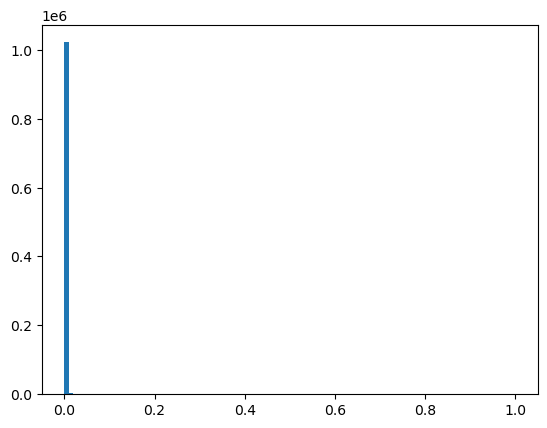

In [47]:
plt.hist(snps[3], bins = 100)

In [50]:
''.join(snps[snps[0] == 1][[1,2]].values[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [52]:
snps[snps[0] == 1][[1,2]].shape[0]

0

In [54]:
snps[snps[0] == 1]

,0,1,2,3


In [53]:
snps[snps[0] == 3529199][[3]]

,3
821549,0.000072


In [33]:
snps[snps[0] == 3529199]

,0,1,2,3
821549,3529199,A,G,0.000072
821550,3529199,A,G,0.000072


In [42]:
np.unique(snps[0].value_counts().values)

array([1])

In [13]:
snps[0].value_counts()

0
3529216    2
3529183    2
2646903    2
3529198    2
3529199    2
          ..
1416154    1
1416158    1
1416160    1
1416164    1
4411528    1
Name: count, Length: 1027664, dtype: int64

In [14]:
df.columns

Index(['wgs_id', 'mapped_reads', 'percent_mapped', 'median_depth',
       'missingness', 'main_lineage', 'sublineage', 'drug_resistance_type',
       'run_accession', 'sample_accession', 'accession', 'study_accession',
       'project_name', 'study_name', 'country_code', 'collection_date',
       'date_of_collection', 'patient_id', 'geographic_source', 'location',
       'country', 'rifampicin', 'isoniazid', 'ethambutol', 'pyrazinamide',
       'streptomycin', 'ofloxacin', 'moxifloxacin', 'levofloxacin', 'amikacin',
       'kanamycin', 'capreomycin', 'ciprofloxacin', 'prothionamide',
       'ethionamide', 'clarithromycin', 'clofazimine', 'bedaquiline',
       'cycloserine', 'linezolid', 'para-aminosalicylic_acid', 'rifabutin',
       'delamanid', 'host_body_site', 'environment_material', 'sample_alias',
       'sample_title', 'host_status', 'hiv_status', 'HIV_status',
       'first_public', 'host', 'id', 'host_sex', 'broker_name', 'tissue_type',
       'culture_collection', 'isolation_

In [20]:
country_names = [
    "United_Kingdom", "South_Africa", "India", "Vietnam", "Peru", "China", 
    "Netherlands", "Canada", "Malawi", "Germany", "Thailand", "Russia", 
    "Italy", "Pakistan", "Denmark", "Brazil", "Portugal", 
    "Democratic Republic of the Congo", "Eswatini", "Ghana", 
    "Uzbekistan", "Spain", "Moldova", "Nepal", "Belarus", "Argentina", 
    "Mexico", "Belgium", "United_States", "Uganda", "Switzerland", 
    "Philippines", "Finland", "Australia", "Ethiopia", "Congo", 
    "Sweden", "Djibouti", "Greenland", "Turkmenistan", "Serbia", 
    "Norway", "South_Korea", "Romania"
]
country_codes = [
    "gb", "za", "in", "vn", "pe", "cn", "nl", "ca", "mw", "de", "th", "ru", 
    "it", "pk", "dk", "br", "pt", "cd", "sz", "gh", "uz", "es", "md", "np", 
    "by", "ar", "mx", "be", "us", "ug", "ch", "ph", "fi", "au", "et", "cg", 
    "se", "dj", "gl", "tm", "rs", "no", "kr", "ro"
]


In [27]:
df['country'].value_counts()

country
South Africa: Kwazulu-Natal        2263
Malawi                             1737
Viet Nam: Ho Chi Minh City         1606
Canada: British Columbia           1342
Russia                             1021
                                   ... 
Sweden                                1
South Africa: Amakhabela Clinic       1
Sierra Leone                          1
Mexico:Baja California,Ensenada       1
Mexico:Baja California,Rosarito       1
Name: count, Length: 108, dtype: int64

In [29]:
for x, y in zip(country_names, country_codes):
    with open(f'/mnt/storage10/lwang/Projects/Amplicone_design_tool/50k_vcf_parsed/vcf_country/{x}.txt', 'w') as f:
        for z in df[df['country_code']==y]['wgs_id'].unique():
            f.write(z+'\n')

In [ ]:
df['country'].value_counts()

In [10]:
df['geographic_source'].value_counts()

geographic_source
India                4391
United Kingdom       3677
UK,United Kingdom    3243
South Africa         2808
Peru                 2598
                     ... 
Sudan                   1
Germany,Iran            1
Tunisia:Kasserine       1
UK,unknown              1
Guinea-Bissau           1
Name: count, Length: 320, dtype: int64

In [5]:
vcf_parse.head()

,SampleID,GenomePosition,Gene,Change,Frequency
0,SAMPLE_ID,Chromosome:11,GENE,A->C,FREQUENCY
1,SAMPLE_ID,Chromosome:15,GENE,C->T,FREQUENCY
2,SAMPLE_ID,Chromosome:16,GENE,"G->A,C",FREQUENCY
3,SAMPLE_ID,Chromosome:22,GENE,G->C,FREQUENCY
4,SAMPLE_ID,Chromosome:23,GENE,G->A,FREQUENCY


In [9]:
full_data = pd.read_csv('/mnt/storage10/jody/projects/variant_dump/variants.csv')
# full_data = full_data[~full_data['drugs'].isna()]
# full_gene = full_data[~full_data['type'].isin(['synonymous_variant','non_coding_transcript_exon_variant'])]
# full_data = full_data.sort_values(by=['genome_pos'])
# full_data = full_data.reset_index(drop=True)
# full_data['weight'] = full_data['freq']
# ref_genome = 'MTB-h37rv_asm19595v2-eg18.fa'
csv_ = "/mnt/storage10//jody/tb_data_2022_08_19.csv"
df = pd.read_csv(csv_)

/tmp/ipykernel_1094827/1519027972.py:9: DtypeWarning: Columns (12,15,16,17,19,20,47,48,49,51,53,54,56,57,58,59,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_)


In [19]:
with open('50k_sample_file.csv','w') as f:
    for x in full_data['wgs_id'].unique():
        f.write(x+'\n')

In [12]:
# full_data_gr = full_data.groupby(['genome_pos', 'gene', 'change']).agg({'freq': 'sum'}).reset_index()
# full_data_gr = full_data.groupby(['genome_pos']).agg({'freq': 'sum'}).reset_index()
full_data_gr = full_data.groupby('genome_pos').size().reset_index(name='count')
# full_data_gr['freq_percent'] = full_data_gr['freq'] / full_data_gr['freq'].sum()*100
full_data_gr['freq_percent'] = full_data_gr['count'] / full_data_gr['count'].sum()*100

In [13]:
full_data_gr

,genome_pos,count,freq_percent
0,5041,3,0.000040
1,5042,2,0.000027
2,5043,10,0.000135
3,5044,12,0.000162
4,5045,6,0.000081
...,...,...,...
90943,4408472,4,0.000054
90944,4408473,23,0.000310
90945,4408474,4,0.000054
90946,4408475,1,0.000013


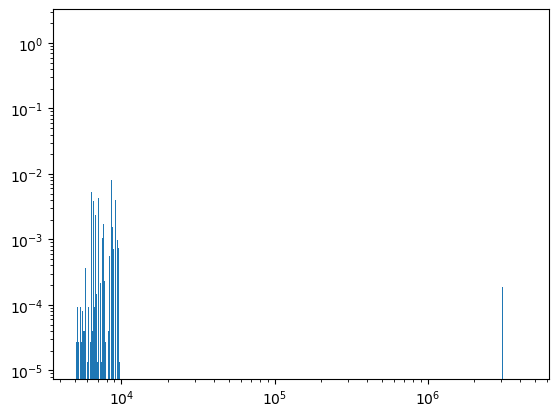

In [14]:
plt.bar(full_data_gr['genome_pos'], full_data_gr['freq_percent'])
plt.yscale('log')
plt.xscale('log')
# plt.xlim(8000, 10000)
plt.show()


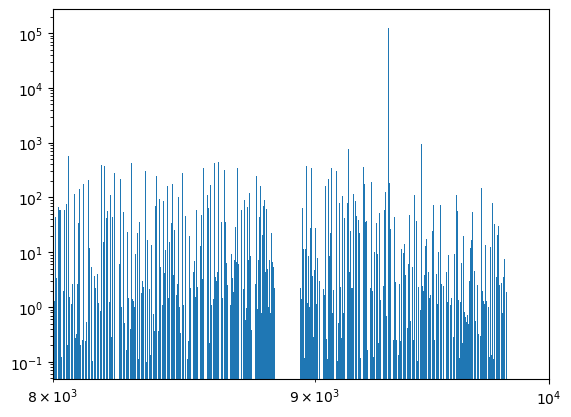

In [17]:
plt.bar(full_data_gr['genome_pos'], full_data_gr['freq'])
plt.yscale('log')
plt.xscale('log')
plt.xlim(8000, 10000)
plt.show()


In [7]:
merged_df = merged_df.sort_values('genome_pos')

In [6]:
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [ ]:
merged_df['change']

In [8]:
print_full(merged_df['change'].head())

4781965    c.-199G>T
3858560    c.-199G>C
4697070    c.-199G>T
3324786    c.-198A>C
1481464    c.-198A>G
Name: change, dtype: object


In [5]:
full_data.rename(columns={'sample_id': 'wgs_id'}, inplace=True)
merged_df = pd.merge(full_data, df[['wgs_id', 'country_code']], on='wgs_id', how='left')
merged_df.rename(columns={'wgs_id': 'sample_id'}, inplace=True)

In [53]:
merged_df.to_csv('/mnt/storage10/lwang/Projects/Amplicone_design_tool/model2in1/variants.csv', index=False)

In [15]:
intersect = np.intersect1d(full_data['sample_id'].unique(), df['wgs_id'].unique())
union = list(set(full_data['sample_id'].unique()) | set(df['wgs_id'].unique()))
len(union) - len(intersect) 

103111

In [10]:
df.columns

Index(['wgs_id', 'mapped_reads', 'percent_mapped', 'median_depth',
       'missingness', 'main_lineage', 'sublineage', 'drug_resistance_type',
       'run_accession', 'sample_accession', 'accession', 'study_accession',
       'project_name', 'study_name', 'country_code', 'collection_date',
       'date_of_collection', 'patient_id', 'geographic_source', 'location',
       'country', 'rifampicin', 'isoniazid', 'ethambutol', 'pyrazinamide',
       'streptomycin', 'ofloxacin', 'moxifloxacin', 'levofloxacin', 'amikacin',
       'kanamycin', 'capreomycin', 'ciprofloxacin', 'prothionamide',
       'ethionamide', 'clarithromycin', 'clofazimine', 'bedaquiline',
       'cycloserine', 'linezolid', 'para-aminosalicylic_acid', 'rifabutin',
       'delamanid', 'host_body_site', 'environment_material', 'sample_alias',
       'sample_title', 'host_status', 'hiv_status', 'HIV_status',
       'first_public', 'host', 'id', 'host_sex', 'broker_name', 'tissue_type',
       'culture_collection', 'isolation_